In [118]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [119]:
df = pd.read_csv("D:\maktabkhooneh\ML\housePrice.csv")

In [120]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [121]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
Area          3479 non-null object
Room          3479 non-null int64
Parking       3479 non-null bool
Warehouse     3479 non-null bool
Elevator      3479 non-null bool
Address       3456 non-null object
Price         3479 non-null float64
Price(USD)    3479 non-null float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [122]:
# df = df.fillna("Unknown")
missing_data = df.isnull().sum()
print(missing_data)

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64


In [123]:
df = df.dropna()
missing_data = df.isnull().sum()
print(missing_data)

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64


In [124]:
df['Address'].value_counts().nlargest(5)

Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                141
Shahran                   130
Name: Address, dtype: int64

In [125]:
# Price: Tomans
df.groupby('Address').mean()['Price'].nlargest(5).reset_index()

,Address,Price
0,Gandhi,7.000000e+10
1,Lavasan,4.800000e+10
2,Mahmoudieh,3.346667e+10
3,Vanak,3.270000e+10
4,Elahieh,2.678635e+10


In [126]:
df['Area'] = df[~df['Area'].str.contains(',', na=False)]['Area']
df['Area'].str.count(',').sum()

0.0

In [127]:
df['Area'] = pd.to_numeric(df['Area'])

In [128]:
df.groupby('Address').mean()['Area'].nlargest(5).reset_index()

,Address,Area
0,Varamin - Beheshti,750.000000
1,Absard,516.666667
2,Gandhi,500.000000
3,Lavasan,415.000000
4,Mahmoudieh,362.666667


In [129]:
# Price: USD
df.groupby('Address').mean()['Price(USD)'].nlargest(5).reset_index()

,Address,Price(USD)
0,Gandhi,2.333333e+06
1,Lavasan,1.600000e+06
2,Mahmoudieh,1.115556e+06
3,Vanak,1.090000e+06
4,Elahieh,8.928784e+05


In [130]:
df.nlargest(5,'Area')

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1694,929.0,5,True,True,False,Zafar,8.000000e+10,2666666.67
1974,900.0,3,True,True,False,Damavand,8.500000e+09,283333.33
573,863.0,2,True,True,True,Gheitarieh,7.830000e+09,261000.00
831,750.0,5,True,True,True,Mahmoudieh,7.500000e+10,2500000.00
3115,750.0,5,True,True,False,Varamin - Beheshti,3.500000e+09,116666.67


In [131]:
(df.groupby('Address').mean()['Price(USD)']/df.groupby('Address').mean()['Area']).nlargest(5).reset_index()

,Address,0
0,Vanak,5046.296296
1,Gandhi,4666.666660
2,Elahieh,4110.190447
3,Zaferanieh,4008.621449
4,Velenjak,3958.512161


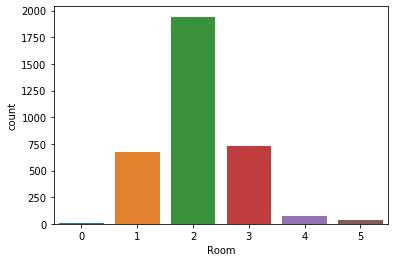

In [132]:
sns.countplot(x="Room",data=df)

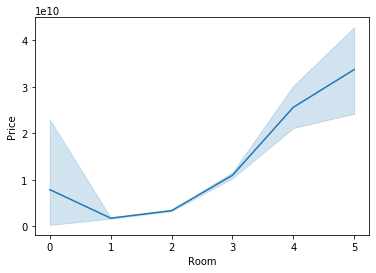

In [133]:
sns.lineplot(data = df, x = 'Room', y ='Price' )

We should seperate 0 bedroom houses as a category of studio
And we can see the relationship is like a Sigmod function

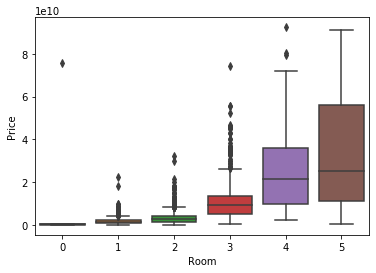

In [134]:
ax = sns.boxplot(x="Room", y="Price", data=df)

In [135]:
df = df[~(df['Room']==0)]

In [136]:
df = df.dropna()
missing_data = df.isnull().sum()
print(missing_data)

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64


In [137]:
df.Parking = df.Parking.astype(int)
df.Warehouse = df.Warehouse.astype(int)
df.Elevator = df.Elevator.astype(int)
df.Area = df.Area.astype(int)

In [138]:
df.nlargest(5,'Area')

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1694,929,5,1,1,0,Zafar,8.000000e+10,2666666.67
1974,900,3,1,1,0,Damavand,8.500000e+09,283333.33
573,863,2,1,1,1,Gheitarieh,7.830000e+09,261000.00
831,750,5,1,1,1,Mahmoudieh,7.500000e+10,2500000.00
3115,750,5,1,1,0,Varamin - Beheshti,3.500000e+09,116666.67


In [139]:
df.nlargest(5,'Price')

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1707,420,4,1,1,1,Zaferanieh,9.240000e+10,3080000.00
1810,705,5,1,1,0,Abazar,9.100000e+10,3033333.33
430,400,5,1,1,0,Lavasan,8.500000e+10,2833333.33
819,680,5,1,1,0,Ekhtiarieh,8.160000e+10,2720000.00
1332,350,4,1,1,1,Niavaran,8.050000e+10,2683333.33


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3440 entries, 0 to 3478
Data columns (total 8 columns):
Area          3440 non-null int32
Room          3440 non-null int64
Parking       3440 non-null int32
Warehouse     3440 non-null int32
Elevator      3440 non-null int32
Address       3440 non-null object
Price         3440 non-null float64
Price(USD)    3440 non-null float64
dtypes: float64(2), int32(4), int64(1), object(1)
memory usage: 188.1+ KB


In [141]:
df['sort'] = df.groupby('Address').transform('mean')['Price(USD)']/df.groupby('Address').transform('mean')['Area']

In [142]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),sort
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67,1218.063145
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67,1218.063145
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33,267.160704
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33,334.179582
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33,2863.491870


In [143]:
df['Address'].unique().shape

(192,)

In [144]:
Address_df = df.groupby('Address').mean()['sort'].reset_index()
# **Then Sorting By sort:**
Address_df = Address_df.sort_values(by=['sort'], ascending=True).reset_index()
## **Add "codedAddress" Column**
Address_df.insert(0, 'codedAddress', range(1, 193))
df1 = pd.Series(Address_df.codedAddress.values,index=Address_df.Address).to_dict()
df["Address_n"] = df["Address"].map(df1)
df = df.drop(['sort'], axis=1)

In [145]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Address_n
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67,115
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67,115
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33,16
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33,23
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33,179


In [226]:
bf = df.groupby('Address').max()['Address_n']
address_dict = bf.to_dict()
print(address_dict)

{'Abazar': 169, 'Abbasabad': 133, 'Absard': 17, 'Abuzar': 82, 'Afsarieh': 70, 'Ahang': 56, 'Air force': 106, 'Ajudaniye': 181, 'Alborz Complex': 24, 'Aliabad South': 31, 'Amir Bahador': 151, 'Amirabad': 104, 'Amirieh': 73, 'Andisheh': 51, 'Aqdasieh': 183, 'Araj': 168, 'Argentina': 178, 'Atabak': 40, 'Azadshahr': 102, 'Azarbaijan': 96, 'Azari': 75, 'Baghestan': 10, 'Bahar': 49, 'Baqershahr': 25, 'Beryanak': 53, 'Boloorsazi': 55, 'Central Janatabad': 129, 'Chahardangeh': 27, 'Chardangeh': 15, 'Chardivari': 150, 'Chidz': 171, 'Damavand': 36, 'Darabad': 164, 'Darakeh': 126, 'Darband': 154, 'Daryan No': 130, 'Dehkade Olampic': 116, 'Dezashib': 177, 'Dolatabad': 47, 'Dorous': 182, 'East Ferdows Boulevard': 131, 'East Pars': 97, 'Ekbatan': 142, 'Ekhtiarieh': 172, 'Elahieh': 190, 'Elm-o-Sanat': 99, 'Enghelab': 65, 'Eram': 90, 'Eskandari': 93, 'Fallah': 46, 'Farmanieh': 185, 'Fatemi': 121, 'Feiz Garden': 117, 'Firoozkooh': 5, 'Firoozkooh Kuhsar': 19, 'Gandhi': 191, 'Garden of Saba': 149, 'Gheit

Address converter

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3440 entries, 0 to 3478
Data columns (total 9 columns):
Area          3440 non-null int32
Room          3440 non-null int64
Parking       3440 non-null int32
Warehouse     3440 non-null int32
Elevator      3440 non-null int32
Address       3440 non-null object
Price         3440 non-null float64
Price(USD)    3440 non-null float64
Address_n     3440 non-null int64
dtypes: float64(2), int32(4), int64(2), object(1)
memory usage: 215.0+ KB


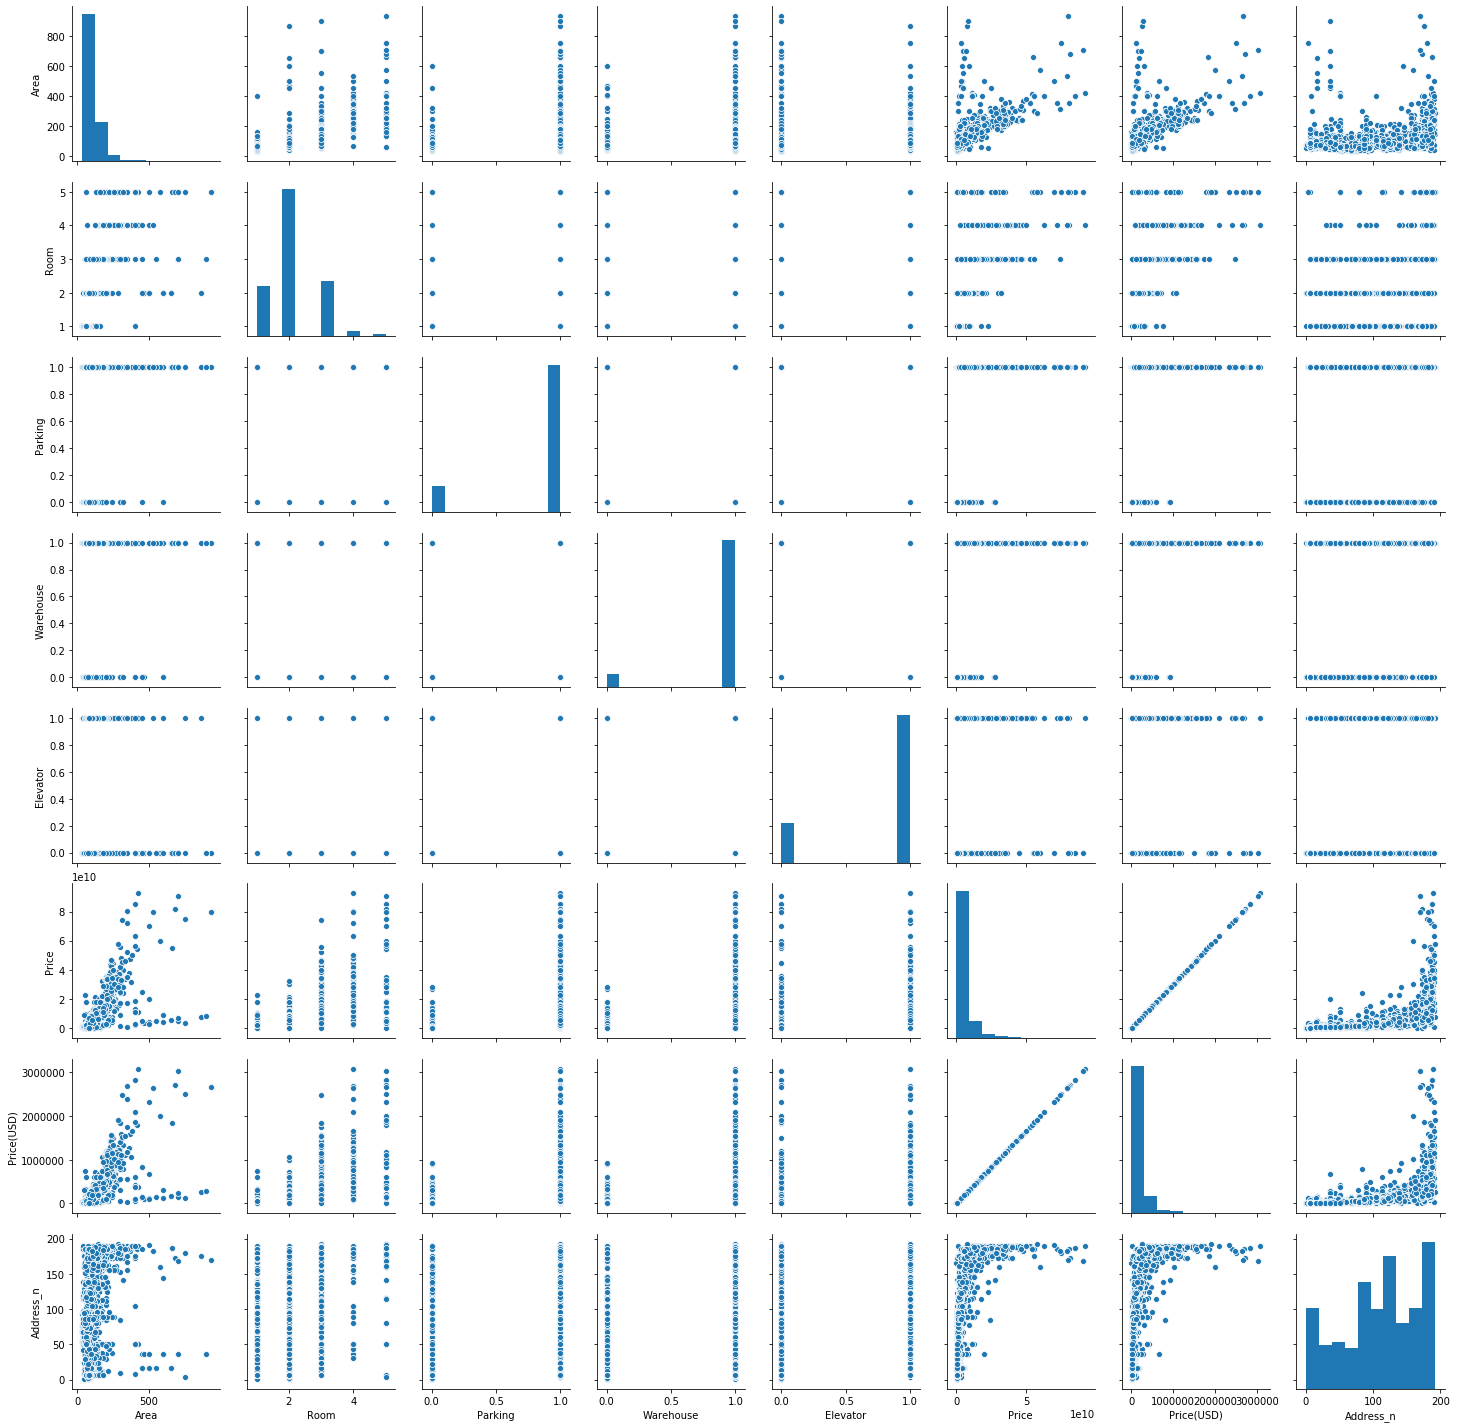

In [147]:
sns.pairplot(data = df)

In [148]:
df.corr()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Address_n
Area,1.000000,0.686861,0.201766,0.081574,0.052803,0.717180,0.717180,0.273672
Room,0.686861,1.000000,0.264698,0.120054,0.171573,0.583270,0.583270,0.314227
Parking,0.201766,0.264698,1.000000,0.427388,0.424160,0.197871,0.197871,0.350631
Warehouse,0.081574,0.120054,0.427388,1.000000,0.196360,0.118048,0.118048,0.256484
Elevator,0.052803,0.171573,0.424160,0.196360,1.000000,0.116183,0.116183,0.243078
Price,0.717180,0.583270,0.197871,0.118048,0.116183,1.000000,1.000000,0.531548
Price(USD),0.717180,0.583270,0.197871,0.118048,0.116183,1.000000,1.000000,0.531548
Address_n,0.273672,0.314227,0.350631,0.256484,0.243078,0.531548,0.531548,1.000000


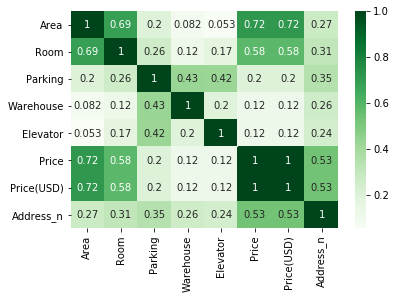

In [149]:
sns.heatmap(df.corr(), annot=True,cmap='Greens')

In [213]:
# Features:
X = df.drop(['Price(USD)'  , 'Price', 'Address'] , axis = 1)
print(X)
x2 = X.iloc[0]
print(x2)
print(x2.shape)
# Label:
y = df['Price(USD)']

      Area  Room  Parking  Warehouse  Elevator  Address_n
0       63     1        1          1         1        115
1       60     1        1          1         1        115
2       79     2        1          1         1         16
3       95     2        1          1         1         23
4      123     2        1          1         1        179
5       70     2        1          1         0        160
6       87     2        1          1         1         16
7       59     1        1          1         1        115
8       54     2        1          1         0         51
9       71     1        1          1         1        125
10      68     2        1          1         1        125
11      64     1        1          1         1        138
12      54     1        0          1         1        138
13     136     3        1          1         1        173
14      95     2        1          1         1        170
15      63     1        0          1         0         38
16     155    

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print()

In [153]:
X_train.shape , X_test.shape

((2752, 6), (688, 6))

In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
model = LinearRegression()

In [156]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
model.coef_

array([  2246.64523951,  32228.40071155, -59633.52840118,  -9242.73485301,
        11047.64122402,   1839.32420975])

In [158]:
pd.DataFrame(model.coef_ , X.columns, columns=['Coefficient'])

,Coefficient
Area,2246.645240
Room,32228.400712
Parking,-59633.528401
Warehouse,-9242.734853
Elevator,11047.641224
Address_n,1839.324210


In [159]:
y_pred = model.predict(X_test)

In [160]:
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

In [161]:
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,8.037402e+04
MSE,2.824998e+10
RMSE,1.680773e+05


In [162]:
test_residuals = y_test - y_pred

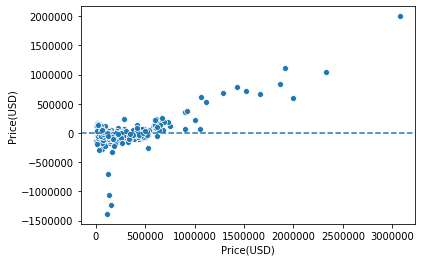

In [165]:
sns.scatterplot(x = y_test, y= test_residuals)
plt.axhline(y = 0 , ls = '--' )

Text(0, 0.5, 'Price(USD)')

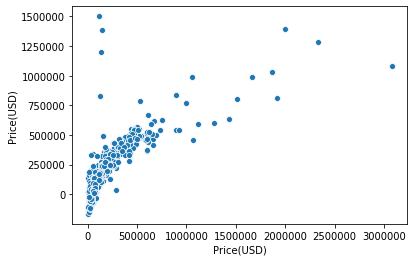

In [166]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Price(USD)')
plt.ylabel('Price(USD)')

In [170]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
train_RMSE_list = []
test_RMSE_list = []

for d in range(1,10):
    
    polynomial_converter = PolynomialFeatures(degree=d , include_bias= False)
    polynomial_features = polynomial_converter.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.2, random_state=100)
    polymodel = LinearRegression()
    polymodel.fit(X_train, y_train)
    
    y_train_pred = polymodel.predict(X_train)
    y_test_pred = polymodel.predict(X_test)
    
    train_RMSE = np.sqrt(mean_squared_error(y_train,y_train_pred))
    test_RMSE = np.sqrt(mean_squared_error(y_test,y_test_pred))
    
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

In [171]:
train_RMSE_list

[157829.5696473824,
 109985.50595961974,
 94411.67261230602,
 86194.66421874208,
 90157.11176037972,
 103331.43907650355,
 72461.1836782809,
 72078.17913653233,
 71733.63093179543]

In [172]:
test_RMSE_list

[168077.3088154981,
 107158.28020069799,
 105836.55613278542,
 167556.5458535014,
 878080.9136608446,
 25759901.249421943,
 36061738.46881803,
 387061967.92164284,
 1511424727.4473073]

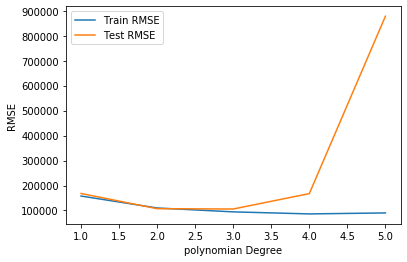

In [173]:
plt.plot(range(1,6), train_RMSE_list[:5], label= 'Train RMSE')
plt.plot(range(1,6), test_RMSE_list[:5], label= 'Test RMSE')

plt.xlabel('polynomian Degree')
plt.ylabel('RMSE')
plt.legend()

In [215]:
polynomial_converter = PolynomialFeatures(degree=2 , include_bias= False)
polynomial_features = polynomial_converter.fit_transform(X)
xx2 = polynomial_converter.fit_transform([x2])
polynomial_features.shape

(3440, 27)

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.2, random_state=100)

           Metrics
MAE   4.854379e+04
MSE   1.148290e+10
RMSE  1.071583e+05


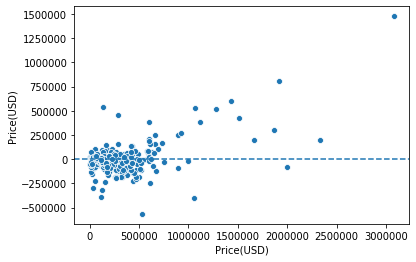

In [183]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
print(pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics']))
test_residuals = y_test - y_pred
sns.scatterplot(x = y_test, y= test_residuals)
plt.axhline(y = 0 , ls = '--' )

In [198]:
from sklearn.metrics import mean_squared_error, r2_score

print("R2-score: %.2f" % r2_score(y_test, y_pred))

R2-score: 0.84


In [227]:
coef = model.coef_
intercept = model.intercept_

In [243]:
from sklearn.preprocessing import PolynomialFeatures

# x = [Area, Room, Parking, Warehouse, Elevator, Address]
def predict_price(x):
    address_code = address_dict[x[-1]]
    x[-1] = address_code
    polynomial_converter = PolynomialFeatures(degree=2 , include_bias= False)
    xx2 = polynomial_converter.fit_transform([x2])
    return (intercept + np.dot(xx2, coef))*30000

In [247]:

x2 = [140, 3, 1, 1, 1, 'Seyed Khandan']
y2 = predict_price(x2)
print(y2)

[8.55523236e+09]
